In [1]:
import pickle # to save the trained models
import time
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

# Import all the scikit learn algorithms we used
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

# Imports for Neural Networks
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# And for Convolutional Neural Networks
from torch import flatten
from torch import unsqueeze

In [2]:
# Load the data
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

# Convert the labels from 0 to 2, since some models need it, namely:
# XGBoost, Neural Networks, Convolutional Neural Networks
y_train_1 = y_train - 1
y_test_1 = y_test - 1

# Create a list to store the results
results = []

Logistic Regression

<Axes: >

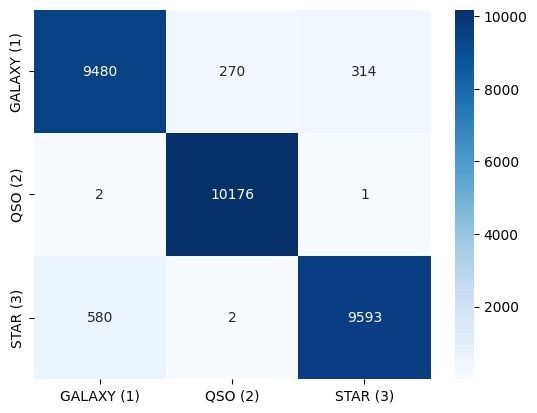

In [3]:
logreg_model = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000, penalty='elasticnet', l1_ratio=0.0)

time_start = time.time()
logreg_model.fit(X_train, y_train)
time_end = time.time()

# Save the model to a file
pickle.dump(logreg_model, open("Models/logistic_regression.pkl", "wb"))

y_pred = logreg_model.predict(X_test)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
total_time = time_end - time_start

# Add the results to the list
results.append(['Logistic Regression', accuracy, precision, recall, f1, total_time])

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
labels = ['GALAXY (1)', 'QSO (2)', 'STAR (3)']

# Create a heatmap with the labels
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

Gaussian Naive Bayes

<Axes: >

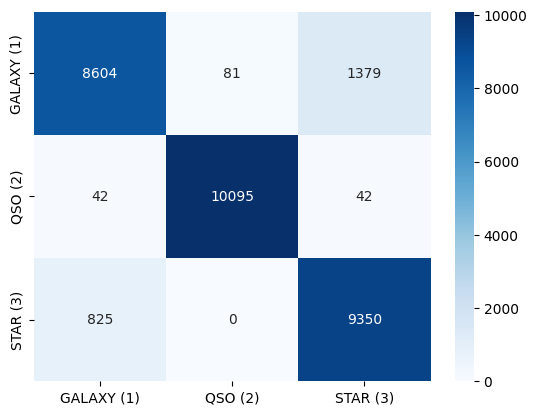

In [4]:
gaussianNB = GaussianNB()

time_start = time.time()
gaussianNB.fit(X_train, y_train)
time_end = time.time()

# Save the model to a file
pickle.dump(gaussianNB, open("Models/gaussian_naive.pkl", "wb"))

y_pred = gaussianNB.predict(X_test)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
total_time = time_end - time_start

# Add the results to the list
results.append(['Gaussian Naive Bayes', accuracy, precision, recall, f1, total_time])

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
labels = ['GALAXY (1)', 'QSO (2)', 'STAR (3)']

# Create a heatmap with the labels
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

Linear Discriminant Analysis

<Axes: >

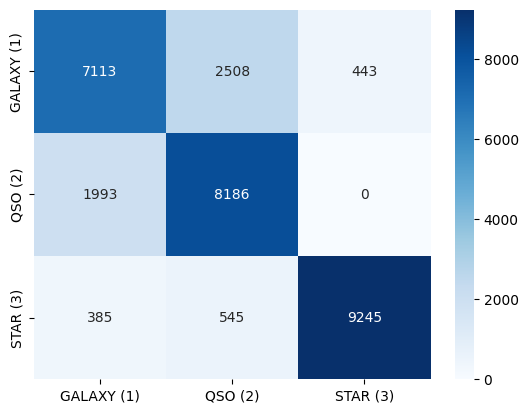

In [5]:
lda_model = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')

time_start = time.time()
lda_model.fit(X_train, y_train)
time_end = time.time()

# Save the model to a file
pickle.dump(lda_model, open("Models/lda.pkl", "wb"))

y_pred = lda_model.predict(X_test)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
total_time = time_end - time_start

# Add the results to the list
results.append(['Linear Discriminant Analysis', accuracy, precision, recall, f1, total_time])

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
labels = ['GALAXY (1)', 'QSO (2)', 'STAR (3)']

# Create a heatmap with the labels
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

Quadratic Discriminant Analysis

<Axes: >

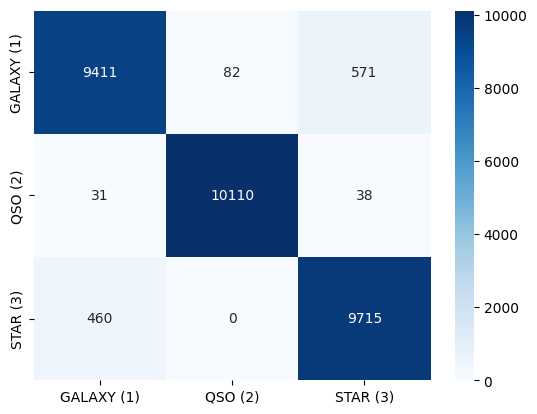

In [6]:
qda_model = QuadraticDiscriminantAnalysis(reg_param=0.0)

time_start = time.time()
qda_model.fit(X_train, y_train)
time_end = time.time()

# Save the model to a file
pickle.dump(qda_model, open("Models/qda.pkl", "wb"))

y_pred = qda_model.predict(X_test)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Add the results to the list
results.append(['Quadratic Discriminant Analysis', accuracy, precision, recall, f1, total_time])

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
labels = ['GALAXY (1)', 'QSO (2)', 'STAR (3)']

# Create a heatmap with the labels
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

K Nearest Neighbours

<Axes: >

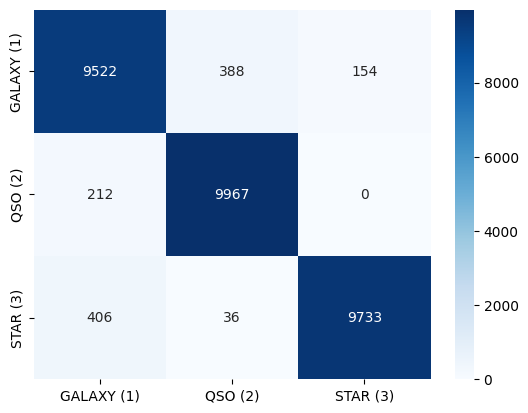

In [7]:
KNN_model = KNeighborsClassifier(n_neighbors = 14, metric='minkowski', weights='uniform', algorithm='brute', leaf_size=33, p=2)

time_start = time.time()
KNN_model.fit(X_train, y_train)
time_end = time.time()

# Save the model to a file
pickle.dump(KNN_model, open("Models/knn.pkl", "wb"))

y_pred = KNN_model.predict(X_test)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
total_time = time_end - time_start

# Add the results to the list
results.append(['K Nearest Neighbours', accuracy, precision, recall, f1, total_time])

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
labels = ['GALAXY (1)', 'QSO (2)', 'STAR (3)']

# Create a heatmap with the labels
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

Decision Tree

<Axes: >

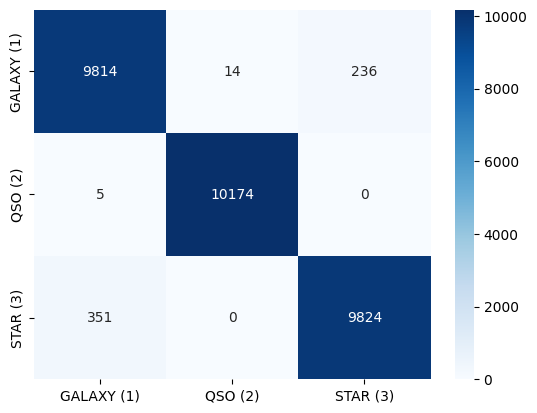

In [8]:
DT_model = DecisionTreeClassifier(random_state=42, criterion='log_loss', max_depth=10, min_samples_leaf=10, min_samples_split=10)

time_start = time.time()
DT_model.fit(X_train, y_train)
time_end = time.time()

# Save the model to a file
pickle.dump(DT_model, open("Models/decision_tree.pkl", "wb"))

y_pred = DT_model.predict(X_test)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Add the results to the list
results.append(['Decision Tree', accuracy, precision, recall, f1, total_time])

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
labels = ['GALAXY (1)', 'QSO (2)', 'STAR (3)']

# Create a heatmap with the labels
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

Random Forest

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


<Axes: >

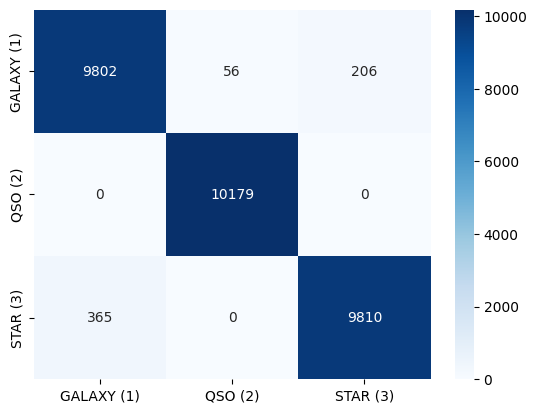

In [9]:
RF_model = RandomForestClassifier(n_estimators=25, random_state=42, max_depth=10, min_samples_leaf=5, criterion='entropy', oob_score=True) 

time_start = time.time()
RF_model.fit(X_train, y_train)
time_end = time.time()

# Save the model to a file
pickle.dump(RF_model, open("Models/random_forest.pkl", "wb"))

y_pred = RF_model.predict(X_test)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
total_time = time_end - time_start

# Add the results to the list
results.append(['Random Forest', accuracy, precision, recall, f1, total_time])

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
labels = ['GALAXY (1)', 'QSO (2)', 'STAR (3)']

# Create a heatmap with the labels
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

XGBoost

<Axes: >

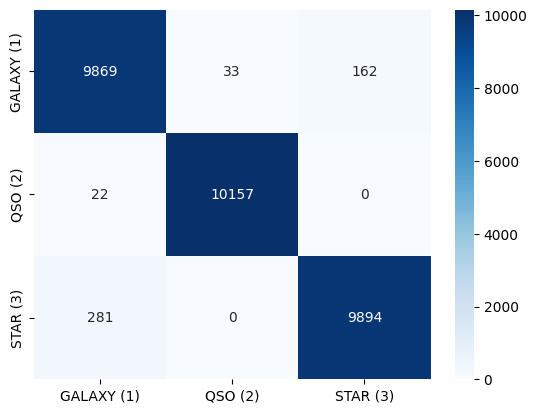

In [10]:
params = {'max_depth': 10, 'learning_rate': 0.1, 'objective': 'multi:softprob', 'num_class': 3}
estimators = 500

# Create the DMatrix from X_train and y_train_1
dtrain = xgb.DMatrix(X_train, label=y_train_1)

time_start = time.time()
# Create the model and train
xgb_model = xgb.train(params, dtrain, num_boost_round=estimators)

time_end = time.time()

# Save the model to a file
pickle.dump(xgb_model, open("Models/xgboost.pkl", "wb"))

# Create a DMatrix from the test data
dtest = xgb.DMatrix(X_test)

# Make predictions on the test set
y_pred = xgb_model.predict(dtest)

# Get the class with the highest probability for each sample
y_pred = np.argmax(y_pred, axis=1)

# Calculate the metrics
accuracy = accuracy_score(y_test_1, y_pred)
precision = precision_score(y_test_1, y_pred, average='weighted')
recall = recall_score(y_test_1, y_pred, average='weighted')
f1 = f1_score(y_test_1, y_pred, average='weighted')
total_time = time_end - time_start

# Add the results to the list
results.append(['XGBoost', accuracy, precision, recall, f1, total_time])

# Confusion Matrix
conf_mat = confusion_matrix(y_test_1, y_pred)
labels = ['GALAXY (1)', 'QSO (2)', 'STAR (3)']

# Create a heatmap with the labels
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

SVM (by F1)

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


<Axes: >

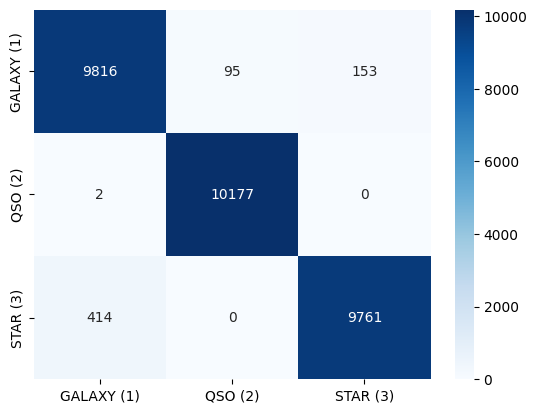

In [11]:
SVC_model_f1 = SVC(kernel='poly', random_state=42, decision_function_shape='ovr', gamma='scale', coef0=5.287036, degree=4, max_iter=1000000)

time_start = time.time()
SVC_model_f1.fit(X_train, y_train)
time_end = time.time()

# Save the model to a file
pickle.dump(SVC_model_f1, open("Models/svm_f1.pkl", "wb"))

y_pred = SVC_model_f1.predict(X_test)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
total_time = time_end - time_start

# Add the results to the list
results.append(['SVM_by_f1', accuracy, precision, recall, f1, total_time])

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
labels = ['GALAXY (1)', 'QSO (2)', 'STAR (3)']

# Create a heatmap with the labels
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

SVM (by Time)

<Axes: >

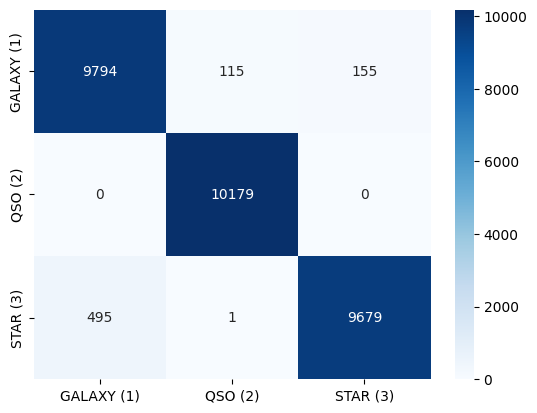

In [12]:
SVC_model_time = SVC(kernel='poly', random_state=42, decision_function_shape='ovo', gamma='auto', coef0=8.523257, degree=2, max_iter=1000000)

time_start = time.time()
SVC_model_time.fit(X_train, y_train)
time_end = time.time()

# Save the model to a file
pickle.dump(SVC_model_time, open("Models/svm_time.pkl", "wb"))

y_pred = SVC_model_time.predict(X_test)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
total_time = time_end - time_start

# Add the results to the list
results.append(['SVM_by_time', accuracy, precision, recall, f1, total_time])

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
labels = ['GALAXY (1)', 'QSO (2)', 'STAR (3)']

# Create a heatmap with the labels
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

Neural Network (by F1)

<Axes: >

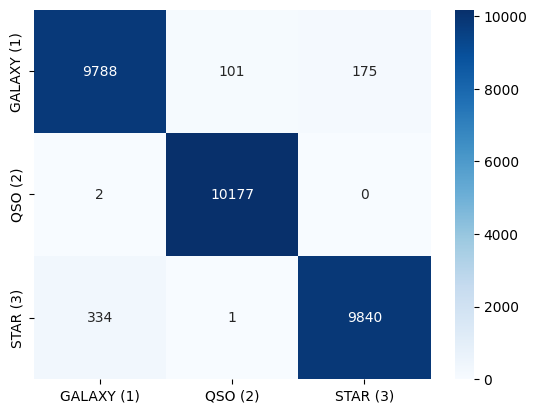

In [13]:
Best_Hyperparameters = {'batch_size': 16, 'learning_rate': 0.1, 'num_epochs': 300, 'optimizer': 'Adagrad'}

# Extract the best hyperparameters
batch_size = Best_Hyperparameters['batch_size']
learning_rate = Best_Hyperparameters['learning_rate']
epochs = Best_Hyperparameters['num_epochs']
optimizer_name = Best_Hyperparameters['optimizer']

# Convert your data into PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_1, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_1, dtype=torch.long)

# Create Tensor datasets
train_data = TensorDataset(X_train_tensor, y_train_tensor)
test_data = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders with the current batch size
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)


NN_model_f1 = nn.Sequential(
    nn.Linear(X_train.shape[1], 32),
    nn.ReLU(),
    nn.Linear(32, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 3),
    nn.Softmax(dim=1)
)

# Define the loss
criterion = nn.CrossEntropyLoss()

# Define the optimizer
if optimizer_name == 'Adagrad':
    optimizer = optim.Adagrad(NN_model_f1.parameters(), lr=learning_rate)

# Start the timer
start_time = time.time()

# Loop over the epochs
for epoch in range(epochs):
    running_loss = 0
    for inputs, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = NN_model_f1(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        

# End the timer
end_time = time.time()

# Save the model to a file
torch.save(NN_model_f1.state_dict(), 'Models/NN_f1.pth')

# Evaluate the model
NN_model_f1.eval()
with torch.no_grad():
    all_labels = []
    all_predictions = []
    for inputs, labels in test_loader:
        outputs = NN_model_f1(inputs)
        _, predicted = torch.max(outputs, 1)   # get the index of the max log-probability
        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted.numpy())

# Calculate the metrics
accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions, average='weighted', zero_division=0)
recall = recall_score(all_labels, all_predictions, average='weighted')
f1 = f1_score(all_labels, all_predictions, average='weighted')
total_time = end_time-start_time

# Add the results to the list
results.append(['NN_by_f1', accuracy, precision, recall, f1, total_time])

# Confusion Matrix
conf_mat = confusion_matrix(all_labels, all_predictions)
labels = ['GALAXY (1)', 'QSO (2)', 'STAR (3)']

# Create a heatmap with the labels
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

Neural Network (by time)

<Axes: >

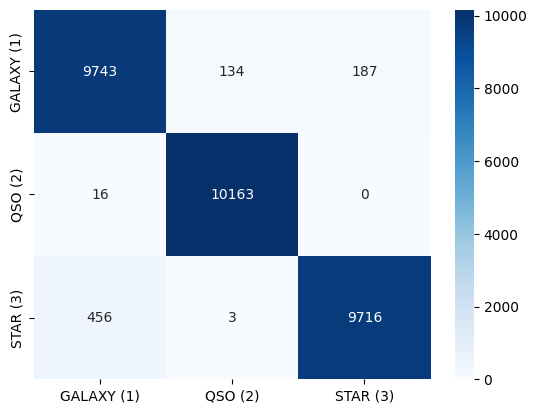

In [14]:
Best_Hyperparameters = {'batch_size': 64, 'learning_rate': 0.0001, 'num_epochs': 50, 'optimizer': 'RMSprop'}

# Extract the best hyperparameters
batch_size = Best_Hyperparameters['batch_size']
learning_rate = Best_Hyperparameters['learning_rate']
epochs = Best_Hyperparameters['num_epochs']
optimizer_name = Best_Hyperparameters['optimizer']

# Convert your data into PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_1, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_1, dtype=torch.long)

# Create Tensor datasets
train_data = TensorDataset(X_train_tensor, y_train_tensor)
test_data = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders with the current batch size
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)


NN_model_time = nn.Sequential(
    nn.Linear(X_train.shape[1], 32),
    nn.ReLU(),
    nn.Linear(32, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 3),
    nn.Softmax(dim=1)
)

# Define the loss
criterion = nn.CrossEntropyLoss()

# Define the optimizer
if optimizer_name == 'RMSprop':
    optimizer = optim.RMSprop(NN_model_time.parameters(), lr=learning_rate)

# Start the timer
start_time = time.time()

# Loop over the epochs
for epoch in range(epochs):
    for inputs, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = NN_model_time(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        

# End the timer
end_time = time.time()

# Save the model to a file
torch.save(NN_model_time.state_dict(), 'Models/NN_time.pth')

# Evaluate the model
NN_model_time.eval()
with torch.no_grad():
    all_labels = []
    all_predictions = []
    for inputs, labels in test_loader:
        outputs = NN_model_time(inputs)
        _, predicted = torch.max(outputs, 1)   # get the index of the max log-probability
        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted.numpy())

# Calculate the metrics
accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions, average='weighted', zero_division=0)
recall = recall_score(all_labels, all_predictions, average='weighted')
f1 = f1_score(all_labels, all_predictions, average='weighted')
total_time = end_time-start_time

# Add the results to the list
results.append(['NN_by_time', accuracy, precision, recall, f1, total_time])

# Confusion Matrix
conf_mat = confusion_matrix(all_labels, all_predictions)
labels = ['GALAXY (1)', 'QSO (2)', 'STAR (3)']

# Create a heatmap with the labels
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

Convolutional Neural Network (by F1)

<Axes: >

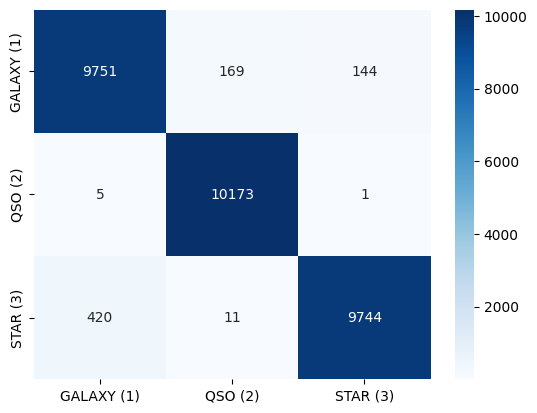

In [15]:
Best_Hyperparameters = {'batch_size': 32, 'learning_rate': 0.001, 'num_epochs': 100, 'optimizer': 'Adam'}

# Get hyperparameters
batch_size = Best_Hyperparameters['batch_size']
learning_rate = Best_Hyperparameters['learning_rate']
num_epochs = Best_Hyperparameters['num_epochs']
optimizer_name = Best_Hyperparameters['optimizer']

class Classifier(nn.Module):
    def __init__(self, dropout):

        super(Classifier, self).__init__()
        self.dropout = nn.Dropout(dropout)

        # First layer
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=20, kernel_size=2)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool1d(kernel_size=2, stride = 2)

        # Second layer
        self.conv2 = nn.Conv1d(in_channels=20, out_channels=40, kernel_size=2)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool1d(kernel_size=2, stride = 2)

        # Third layer (fully connected)
        self.fc1 = nn.Linear(in_features=40, out_features=20)
        self.relu3 = nn.ReLU()

        # Softmax Classifier
        self.fc2 = nn.Linear(in_features=20, out_features=3)
        self.softmax = nn.Softmax(dim=1)


    # specifying the flow of data through the layers
    def forward(self, x):
        # Pass through conv1
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)

        # Pass through conv2
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)

        # Flatten the output before fully connected layers
        x = torch.flatten(x, 1)

        # Pass through the fully connected layers
        x = self.fc1(x)
        x = self.relu3(x)

        x = self.fc2(x)
        output = self.softmax(x)

        return output  # Return the output
    

# Assuming X_train and X_test have shapes (num_samples, num_features)
X_train_tensor = torch.tensor(X_train.transpose(0, 1), dtype=torch.float32).unsqueeze(1)  # Shape: (num_features, num_samples) -> (num_samples, 1, num_features)
X_test_tensor = torch.tensor(X_test.transpose(0, 1), dtype=torch.float32).unsqueeze(1)    # Shape: (num_features, num_samples) -> (num_samples, 1, num_features)

# Convert your data into PyTorch tensors
y_train_tensor = torch.tensor(y_train_1, dtype=torch.long)
y_test_tensor = torch.tensor(y_test_1, dtype=torch.long)

# Create Tensor datasets
train_data = TensorDataset(X_train_tensor, y_train_tensor)
test_data = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)  # amount of data to be loaded each time
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

# Instantiate the more complex CNN
CNN_f1 = Classifier(0.67)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
if optimizer_name == 'Adam':
    optimizer = optim.Adam(CNN_f1.parameters(), lr=learning_rate)

# Start the timer
start_time = time.time()

# Train the model
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = CNN_f1(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

# End the timer
end_time = time.time()

# Save the model to a file
torch.save(CNN_f1.state_dict(), 'Models/NN_time.pth')

# Evaluate the model
CNN_f1.eval()
with torch.no_grad():
    all_labels = []
    all_predictions = []
    for inputs, labels in test_loader:
        outputs = CNN_f1(inputs)
        _, predicted = torch.max(outputs, 1)   # get the index of the max log-probability
        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted.numpy())

# Calculate metrics
accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions, average='weighted', zero_division=0)
recall = recall_score(all_labels, all_predictions, average='weighted')
f1 = f1_score(all_labels, all_predictions, average='weighted')
total_time = end_time-start_time

# Add the results to the list
results.append(['CNN', accuracy, precision, recall, f1, total_time])

# Confusion Matrix
conf_mat = confusion_matrix(all_labels, all_predictions)
labels = ['GALAXY (1)', 'QSO (2)', 'STAR (3)']

# Create a heatmap with the labels
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

Convolutional Neural Network (by time)

In [16]:
print("Hi ^_^")

Hi ^_^


Save the Results

In [17]:
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1', 'Total Time'])
results_df.to_csv('Model_Training_Results.csv', index=False)